In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

In [2]:
import seaborn as sns #관리자 권한으로 실행하면 되긴함 뭐여 이거

In [3]:
# ad.co.kr/stat/index.hjsp
df2015 = pd.read_csv('./ad/2015ad.csv')
df2015.drop('Unnamed: 0', axis=1, inplace=True)
df2015.drop(0, inplace=True)
df2015.head()

,firm,tv,radio,newpaper,magazine
1,삼성전자,11479225,423815,6203885,242300
2,KT,8380633,368017,905887,25100
3,LG전자,6748621,342048,1969787,114800
4,한국지엠,6791838,596281,662799,35200
5,현대자동차,4453752,414230,2817550,108300


In [4]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 5 columns):
firm        99 non-null object
tv          99 non-null object
radio       99 non-null object
newpaper    99 non-null object
magazine    99 non-null object
dtypes: object(5)
memory usage: 4.6+ KB


In [5]:
# 정수형으로 데이터 변경하기
df2015['tv'] = pd.to_numeric(df2015.tv)
df2015['radio'] = pd.to_numeric(df2015.radio)
df2015['newpaper'] = pd.to_numeric(df2015.newpaper)
df2015['magazine'] = pd.to_numeric(df2015.magazine)
df2015.info()
#인덱스 설정하기
df2015.set_index('firm', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 5 columns):
firm        99 non-null object
tv          99 non-null int64
radio       99 non-null int64
newpaper    99 non-null int64
magazine    99 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.6+ KB


In [6]:
# TV 광고액 상위 10개 기업 추출
df2015.sort_values('tv', ascending=False).head(10)

,tv,radio,newpaper,magazine
firm,,,,
삼성전자,11479225,423815,6203885,242300
KT,8380633,368017,905887,25100
한국지엠,6791838,596281,662799,35200
LG전자,6748621,342048,1969787,114800
NHN엔터테인먼트,6455304,504860,0,1500
LGU플러스,5524647,358048,28231,25000
기아자동차,4784181,568812,1586957,58800
현대자동차,4453752,414230,2817550,108300
케이투코리아,3804675,0,84597,33000


In [7]:
# 2019년까지 df가져오기
for i in range(2016,2020):
    exec("df{} = pd.read_csv('./ad/{}ad.csv')".format(i,i))
    exec("df{}.drop('Unnamed: 0', axis=1, inplace=True)".format(i))
    exec("df{}.drop(0, inplace=True)".format(i))
    exec("df{}['tv'] = pd.to_numeric(df{}.tv)".format(i,i))
    exec("df{}['radio'] = pd.to_numeric(df{}.radio)".format(i,i))
    exec("df{}['newpaper'] = pd.to_numeric(df{}.newpaper)".format(i,i))
    exec("df{}['magazine'] = pd.to_numeric(df{}.magazine)".format(i,i))
    exec("df{}.set_index('firm', inplace=True)".format(i))
    exec("print(df{}.info())".format(i))
# date컬럼 만들기
for i in range(2015,2020):
    exec("df{}['date']='{}.09'".format(i,i))
# 출제의도는 일단 CSV파일 가져오고
# for i in [df2015, ...df2019]: 로 해결하는 것

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 삼성전자 to OB맥주
Data columns (total 4 columns):
tv          100 non-null int64
radio       100 non-null int64
newpaper    100 non-null int64
magazine    100 non-null int64
dtypes: int64(4)
memory usage: 3.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 삼성전자 to GS건설
Data columns (total 4 columns):
tv          100 non-null int64
radio       100 non-null int64
newpaper    100 non-null int64
magazine    100 non-null int64
dtypes: int64(4)
memory usage: 3.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, LG전자 to 쿠쿠전자
Data columns (total 4 columns):
tv          100 non-null int64
radio       100 non-null int64
newpaper    100 non-null int64
magazine    100 non-null int64
dtypes: int64(4)
memory usage: 3.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 삼성전자 to 경북도청
Data columns (total 4 columns):
tv          100 non-null int64
radio       100 non-null int64
newpaper    100 non-nu

In [8]:
for df in [df2015, df2016, df2017, df2018, df2019]:
    df['date'] = pd.to_datetime(df.date)
    print(df.head())
    print('*'*30)

             tv   radio  newpaper  magazine       date
firm                                                  
삼성전자   11479225  423815   6203885    242300 2015-09-01
KT      8380633  368017    905887     25100 2015-09-01
LG전자    6748621  342048   1969787    114800 2015-09-01
한국지엠    6791838  596281    662799     35200 2015-09-01
현대자동차   4453752  414230   2817550    108300 2015-09-01
******************************
             tv   radio  newpaper  magazine       date
firm                                                  
삼성전자    8571937  255932   6769684    223800 2016-09-01
현대자동차   4929457  448627   2711580    115300 2016-09-01
아모레퍼시픽  4563944  222294   1742959    987600 2016-09-01
LG전자    5587791   72904   1298358    184400 2016-09-01
KT      4792340  317334   1120930     33100 2016-09-01
******************************
              tv   radio  newpaper  magazine       date
firm                                                   
삼성전자    11668720  242469   7356007    391700 2017-09-01


In [9]:
# 하나의 df로 합치기
df1 = pd.concat([df2015, df2016, df2017, df2018, df2019], axis=0)
df1.head()

,tv,radio,newpaper,magazine,date
firm,,,,,
삼성전자,11479225,423815,6203885,242300,2015-09-01
KT,8380633,368017,905887,25100,2015-09-01
LG전자,6748621,342048,1969787,114800,2015-09-01
한국지엠,6791838,596281,662799,35200,2015-09-01
현대자동차,4453752,414230,2817550,108300,2015-09-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 삼성전자 to 경북도청
Data columns (total 5 columns):
tv          100 non-null int64
radio       100 non-null int64
newpaper    100 non-null int64
magazine    100 non-null int64
date        100 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.7+ KB


In [11]:
#total은 매체금액합계
df1['total'] = df1.sum(axis=1)
df1.head()

,tv,radio,newpaper,magazine,date,total
firm,,,,,,
삼성전자,11479225,423815,6203885,242300,2015-09-01,18349225
KT,8380633,368017,905887,25100,2015-09-01,9679637
LG전자,6748621,342048,1969787,114800,2015-09-01,9175256
한국지엠,6791838,596281,662799,35200,2015-09-01,8086118
현대자동차,4453752,414230,2817550,108300,2015-09-01,7793832


In [18]:
# year, month컬럼에 년 월 저장하기
# date컬럼의 타입은 Timestamp
#type(df1.date[2])
df1['year'] = df1.date.apply(lambda x:x.year)
df1['month'] = df1.date.apply(lambda x:x.month)
df1.head()

,tv,radio,newpaper,magazine,date,total,year,month
firm,,,,,,,,
삼성전자,11479225,423815,6203885,242300,2015-09-01,18349225,2015,9
KT,8380633,368017,905887,25100,2015-09-01,9679637,2015,9
LG전자,6748621,342048,1969787,114800,2015-09-01,9175256,2015,9
한국지엠,6791838,596281,662799,35200,2015-09-01,8086118,2015,9
현대자동차,4453752,414230,2817550,108300,2015-09-01,7793832,2015,9


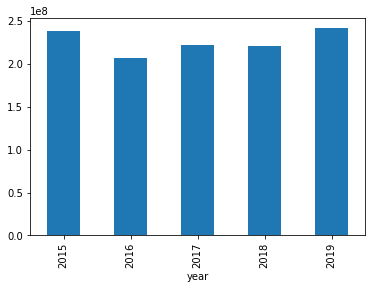

In [25]:
# 연도별 광고비 총액?
df1.groupby('year').total.sum().plot(kind='bar')

In [42]:
# 연도별 광고비 총액 최대기업은
maxaddict = dict(df1.groupby('year').total.max())
for y,t in maxaddict.items():
    print(df1[(df1.year==y)&(df1.total==t)])

            tv   radio  newpaper  magazine       date     total  year  month
firm                                                                        
삼성전자  11479225  423815   6203885    242300 2015-09-01  18349225  2015      9
           tv   radio  newpaper  magazine       date     total  year  month
firm                                                                       
삼성전자  8571937  255932   6769684    223800 2016-09-01  15821353  2016      9
            tv   radio  newpaper  magazine       date     total  year  month
firm                                                                        
삼성전자  11668720  242469   7356007    391700 2017-09-01  19658896  2017      9
            tv  radio  newpaper  magazine       date     total  year  month
firm                                                                       
LG전자  17908248  89237   1516482    160100 2018-09-01  19674067  2018      9
           tv   radio  newpaper  magazine       date     total  year  month
firm  

In [45]:
# 역대 광고비 총액 최대기업은
df1.sort_values('total', ascending=False).head(5)

,tv,radio,newpaper,magazine,date,total,year,month
firm,,,,,,,,
LG전자,17908248,89237,1516482,160100,2018-09-01,19674067,2018,9
삼성전자,11668720,242469,7356007,391700,2017-09-01,19658896,2017,9
삼성전자,12279508,291138,6285213,268100,2018-09-01,19123959,2018,9
삼성전자,11479225,423815,6203885,242300,2015-09-01,18349225,2015,9
LG전자,13776012,322223,2679913,155700,2017-09-01,16933848,2017,9


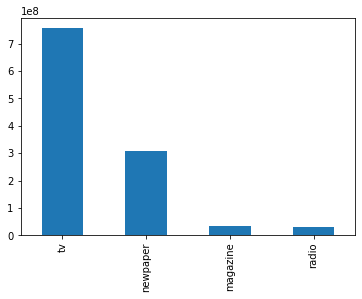

In [51]:
# 5년간 매체별 광고비 총액
df1.sum()[:4].sort_values(ascending=False).plot(kind='bar')

In [57]:
# matplotlib 한글화 코드
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

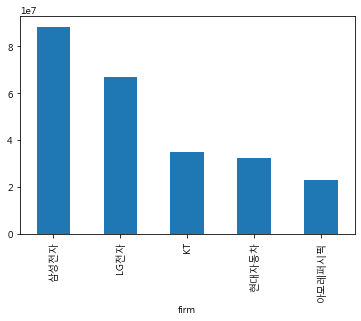

In [58]:
# 5년간 광고비총액 상위 5개 기업
df1.groupby('firm').sum().sort_values('total',ascending=False).head(5)
df1.groupby('firm').total.sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [70]:
# 5년간 광고비가 증가추세인 기업과 감소추세인 기업???
#기업 2019년 기준 상위 10위기업 대상
top10 = dict(df1[df1.year==2019].groupby('firm').total.sum().sort_values(ascending=False).head(10))
top10list = list(top10.keys())
top10list

['삼성전자',
 'LG전자',
 '한화공동',
 'KT',
 '대웅제약',
 '현대자동차',
 '동국제약',
 'SK텔레콤',
 '기아자동차',
 'LG생활건강']

In [120]:
df1['firmname'] = df1.index
df1['top10'] = df1.firmname.apply(lambda x:x in top10list)
df1.head()



year,2015,2016,2017,2018,2019
firmname,,,,,
(주)하나은행,3359583.0,NaN,4243657.0,1720094.0,NaN
20세기폭스사,976176.0,NaN,NaN,NaN,NaN
AIA생명보험,1731998.0,2434777.0,2143309.0,1165099.0,1720102.0
AXA다이렉트,NaN,1972264.0,1777136.0,NaN,NaN
CJE&M,NaN,913341.0,NaN,NaN,NaN
...,...,...,...,...,...
현대해상화재보험,1526086.0,921445.0,1447351.0,NaN,2329428.0
호반건설,NaN,NaN,NaN,NaN,1116328.0
홈앤쇼핑,NaN,1194301.0,NaN,NaN,NaN


In [125]:
df10 = df1[df1.top10].groupby(['firmname', 'year']).total.sum().unstack() #연도와 기업명을 컬럼과 row로 사용

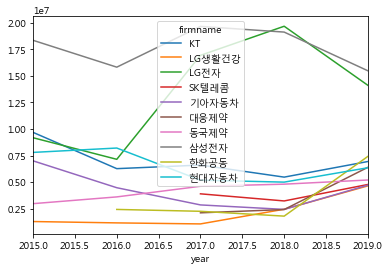

In [126]:
df10.T.plot() #T= 교차(Transform)

In [127]:
df10

year,2015,2016,2017,2018,2019
firmname,,,,,
KT,9679637.0,6263704.0,6601365.0,5466186.0,6935642.0
LG생활건강,1284205.0,1156250.0,1059669.0,2442729.0,4642145.0
LG전자,9175256.0,7143453.0,16933848.0,19674067.0,14111554.0
SK텔레콤,5196437.0,NaN,3893006.0,3222873.0,4773794.0
기아자동차,6998750.0,4468229.0,2848444.0,2427712.0,4705349.0
대웅제약,NaN,NaN,2104715.0,2413250.0,6390754.0
동국제약,2967575.0,3603541.0,4604770.0,4802179.0,5194760.0
삼성전자,18349225.0,15821353.0,19658896.0,19123959.0,15480902.0
한화공동,NaN,2424043.0,2248518.0,1793345.0,7417422.0
